In [ ]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [ ]:
%run ../test/test_algorithms.py

In [ ]:
%run ../test/test_dataloader.py

In [ ]:
%run ../test/test_predictorsI.py

In [ ]:
%run ../test/test_predictorsII.py

In [ ]:
%run ../test/test_activate.py

## Running example of the system

In [ ]:
%run ../consensus/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(10)

In [ ]:
op0.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## Whole system test - I am alive v.2

In [31]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [32]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [33]:
training = training.get_close()

In [15]:
predict = DataLoader('aapl', '2010-06-01', '2010-09-01')

In [16]:
predict = predict.get_close()

In [17]:
predict_req, real = data_prep(predict, 24, 30)

In [30]:
real

,Close
Date,
2010-07-06,8.879643
2010-07-07,9.238214
2010-07-08,9.217500
2010-07-09,9.272143
2010-07-12,9.188929
2010-07-13,8.992857
2010-07-14,9.026071
2010-07-15,8.980357
2010-07-16,8.925000


In [ ]:
final_df1 = individual_predictors1(training, predict_req, 30)

In [ ]:
final_df2 = individual_predictors2(training, predict_req, 30)

In [ ]:
final_df3 = individual_predictors3(training, predict_req, 30)

Epoch 1/10
23/23 [==============================] - 0s 8ms/step - loss: 17.3499 - mean_squared_error: 17.3499 - val_loss: 10.3052 - val_mean_squared_error: 10.3052
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 2.5544 - mean_squared_error: 2.5544 - val_loss: 1.3401 - val_mean_squared_error: 1.3401
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2870 - mean_squared_error: 0.2870 - val_loss: 0.3912 - val_mean_squared_error: 0.3912
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1256 - mean_squared_error: 0.1256 - val_loss: 0.3639 - val_mean_squared_error: 0.3639
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1205 - mean_squared_error: 0.1205 - val_loss: 0.3557 - val_mean_squared_error: 0.3557
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.3484 - val_mean_squared_error: 0.3484
Epoch 7/10
23/23 [==================

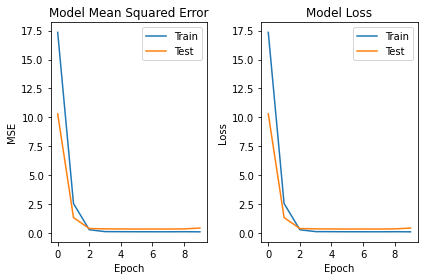

Epoch 1/10
23/23 [==============================] - 1s 45ms/step - loss: 30.4752 - mean_squared_error: 30.4752 - val_loss: 29.2265 - val_mean_squared_error: 29.2265
Epoch 2/10
23/23 [==============================] - 1s 23ms/step - loss: 10.5437 - mean_squared_error: 10.5437 - val_loss: 5.3265 - val_mean_squared_error: 5.3265
Epoch 3/10
23/23 [==============================] - 0s 21ms/step - loss: 1.4019 - mean_squared_error: 1.4019 - val_loss: 0.8929 - val_mean_squared_error: 0.8929
Epoch 4/10
23/23 [==============================] - 0s 21ms/step - loss: 0.2126 - mean_squared_error: 0.2126 - val_loss: 0.5021 - val_mean_squared_error: 0.5021
Epoch 5/10
23/23 [==============================] - 0s 21ms/step - loss: 0.1307 - mean_squared_error: 0.1307 - val_loss: 0.5113 - val_mean_squared_error: 0.5113
Epoch 6/10
23/23 [==============================] - 0s 21ms/step - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.5246 - val_mean_squared_error: 0.5246
Epoch 7/10
23/23 [==========

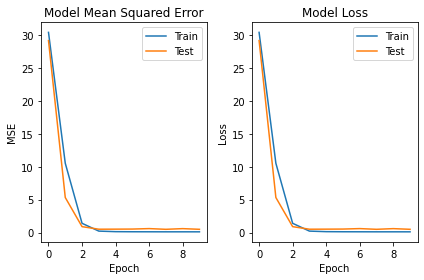

In [18]:
final_df4 = individual_predictors4(training, predict_req, 30)

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[50/50]: 100%|█| 50/50 [00:02<00:00, 22.83it/s, SmoothL1Loss=0.000614, MAE=0.16, RegLoss=0, MAE_val=0.497, SmoothL


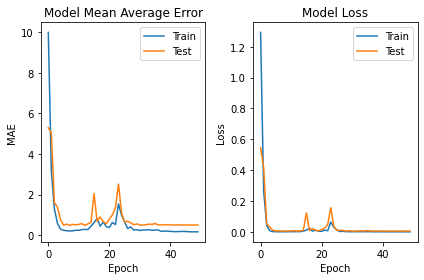

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 13 forecasts with cutoffs between 2009-10-02 00:00:00 and 2010-03-31 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

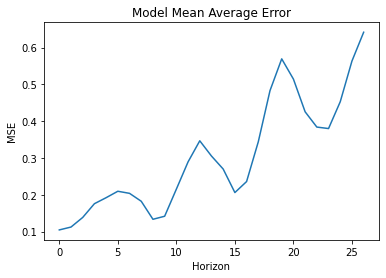

In [34]:
final_df5 = individual_predictors5(training, 30)

### System Disagreement

In [ ]:
system_disagreement(final_df1)

In [ ]:
system_disagreement(final_df2)

In [ ]:
system_disagreement(final_df3)

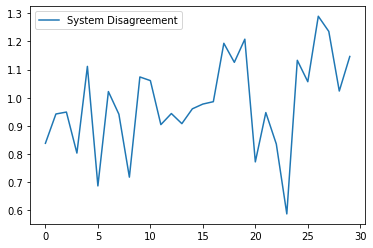

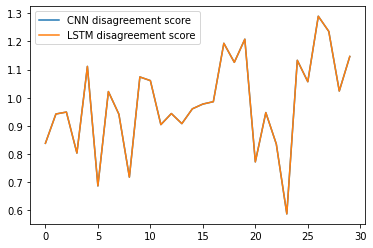

In [19]:
system_disagreement(final_df4)

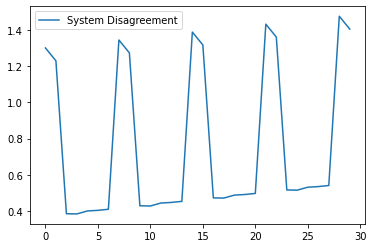

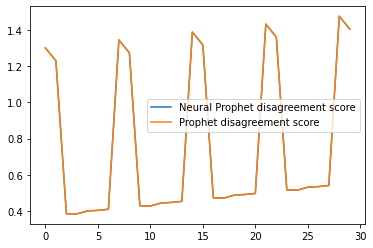

In [35]:
system_disagreement(final_df5)

### System consensus

In [ ]:
algos1 = consensus(final_df1, real)

In [ ]:
algos2 = consensus(final_df2, real)

In [ ]:
algos3 = consensus(final_df3, real)

In [20]:
algos4 = consensus(final_df4, real)

In [36]:
algos5 = consensus(final_df5, real)

In [ ]:
ui1 = combined_frame(final_df1, algos1, real)

In [ ]:
ui2 = combined_frame(final_df2, algos2, real)

In [ ]:
ui3 = combined_frame(final_df3, algos3, real)

In [21]:
ui4 = combined_frame(final_df4, algos4, real)

In [37]:
ui5 = combined_frame(final_df5, algos5, real)

In [40]:
ui5

,Average,NoMemory,Memory,Focus,Anchor,Real Value,Neural Prophet,Prophet
Date,,,,,,,,
2010-07-06,7.888090,7.888090,7.888090,7.888090,8.213018,8.879643,6.588375,9.187804
2010-07-07,7.979570,8.916924,8.448247,9.208240,8.377919,9.238214,6.750899,9.208240
2010-07-08,8.725440,9.101779,8.948924,9.110959,8.984000,9.217500,8.339921,9.110959
2010-07-09,8.730552,9.031773,8.973012,9.115017,8.900501,9.272143,8.346086,9.115017
2010-07-12,8.759550,9.044017,9.018614,9.160274,8.948089,9.188929,8.358826,9.160274
2010-07-13,8.782034,9.159207,9.062625,9.186177,8.935566,8.992857,8.377892,9.186177
2010-07-14,8.778530,8.992448,9.053127,9.188605,8.860424,9.026071,8.368455,9.188605
2010-07-15,7.987468,8.798398,8.875953,9.330854,8.264784,8.980357,6.644082,9.330854
2010-07-16,8.078948,9.019329,8.931433,9.351290,8.481812,8.925000,6.806607,9.351290


,Algorithms,MSE
0,Average,0.414177
1,NoMemory,0.080217
2,Memory,0.100747
3,Focus,0.281910
4,Anchor,0.179085
5,Neural Prophet,2.209210
6,Prophet,0.128810


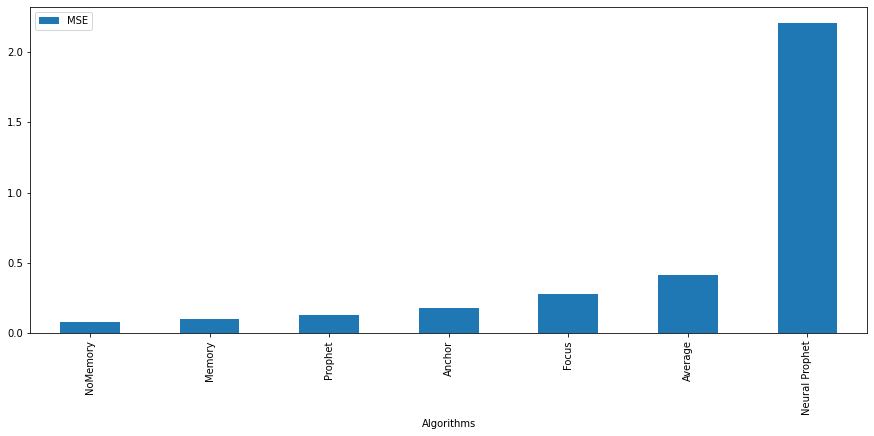

In [38]:
mse_score(ui5)

,Algorithms,MSE Log
0,Average,0.000894
1,NoMemory,0.001018
2,Memory,0.000837
3,Focus,0.007613
4,Anchor,0.000657
5,CNN,0.010188
6,LSTM,0.010775


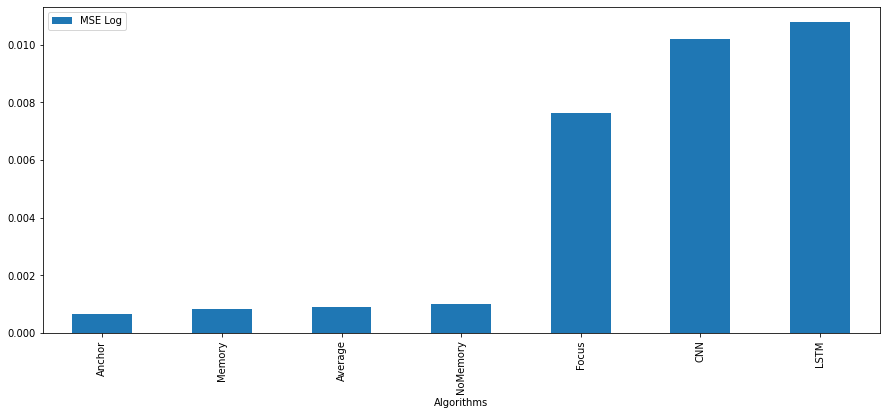

In [23]:
mse_log_score(ui4)

In [ ]:
mae_score(ui1)

In [ ]:
mse_score(ui2)

In [ ]:
mse_log_score(ui1)

In [ ]:
mae_score(ui2)

In [ ]:
mse_score(ui3)

In [ ]:
mse_log_score(ui3)

In [ ]:
mae_score(ui3)

In [ ]:
plot_performance(ui1)

In [ ]:
plot_performance(ui2)

In [ ]:
plot_performance(ui3)

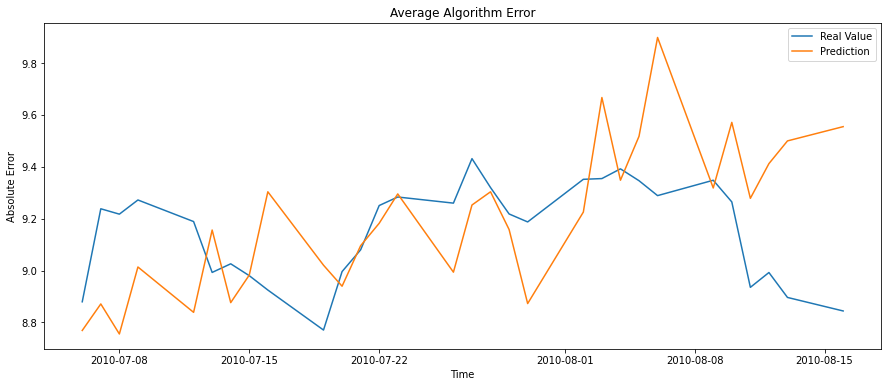

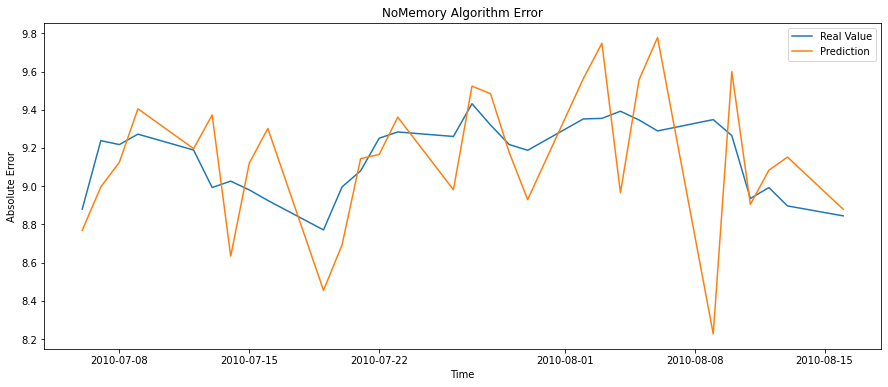

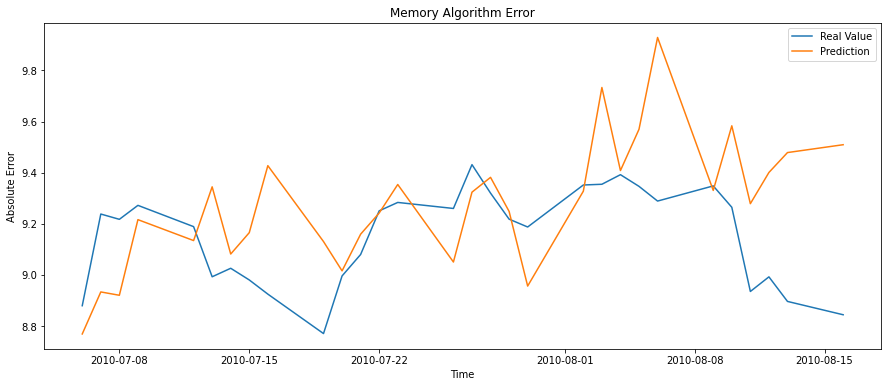

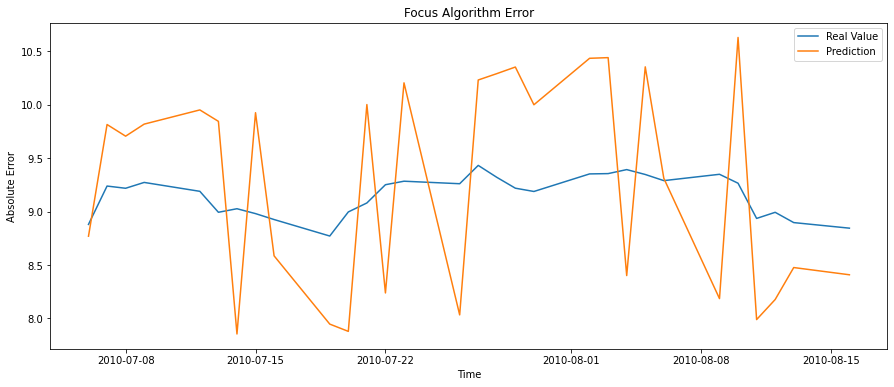

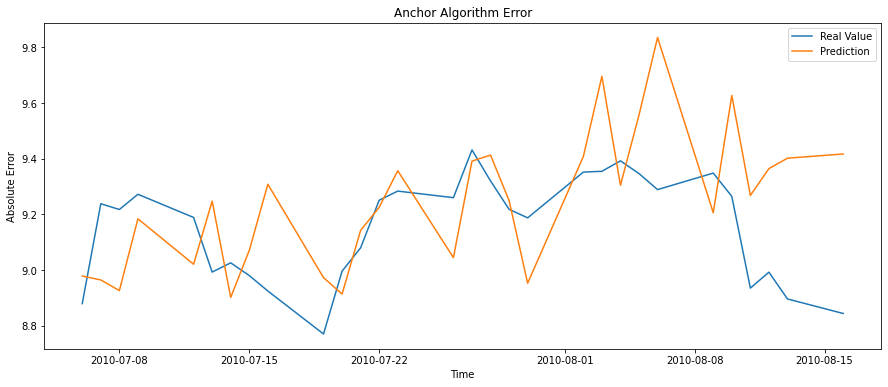

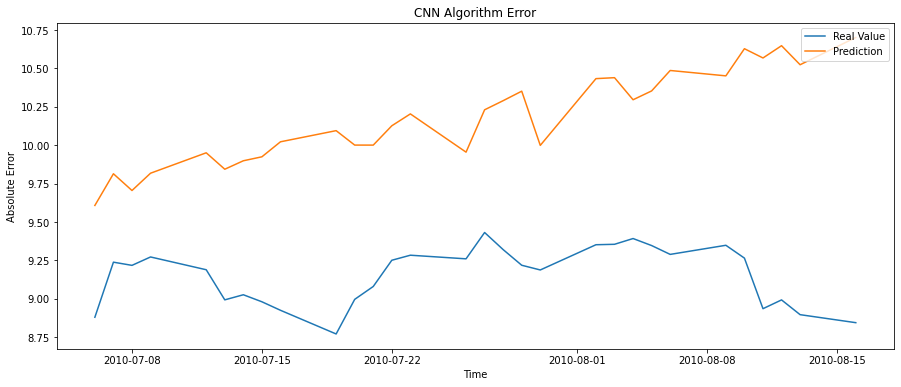

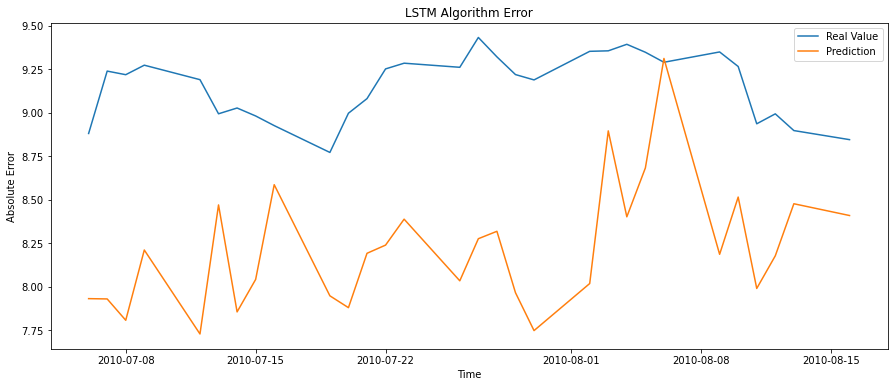

In [25]:
plot_performance(ui4)

In [24]:
ui4

,Average,NoMemory,Memory,Focus,Anchor,Real Value,CNN,LSTM
Date,,,,,,,,
2010-07-06,8.769109,8.769109,8.769109,8.769109,8.978727,8.879643,9.607580,7.930638
2010-07-07,8.871388,8.995632,8.933510,9.813853,8.964623,9.238214,9.813853,7.928923
2010-07-08,8.755594,9.125081,8.920471,9.704898,8.926435,9.217500,9.704898,7.806289
2010-07-09,9.013786,9.404862,9.216251,9.817520,9.184124,9.272143,9.817520,8.210052
2010-07-12,8.838989,9.196247,9.134417,9.950399,9.020955,9.188929,9.950399,7.727579
2010-07-13,9.156290,9.372652,9.344566,9.843458,9.247679,8.992857,9.843458,8.469122
2010-07-14,8.876468,8.633393,9.081763,7.854440,8.902086,9.026071,9.898496,7.854440
2010-07-15,8.982684,9.120522,9.165420,9.924340,9.070645,8.980357,9.924340,8.041027
2010-07-16,9.303694,9.301920,9.427405,8.585371,9.308147,8.925000,10.022017,8.585371


In [2]:
training = DataLoader('aapl', '2000-01-01', '2010-05-01')

In [3]:
training = training.get_close()

In [ ]:
motest = HybridUnivariatePredictor(training,2, 24, 30)

In [ ]:
motest.create_cnnlstm()

In [ ]:
motest.fit_model(300)

In [ ]:
motest.show_performance()

In [ ]:
motest.save_model()

In [4]:
moload = HybridUnivariatePredictor(training,2, 24, 30)

In [5]:
moload.load_model('../pretrained/model')

In [6]:
moload.model_blueprint()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 11, 64)      192       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 10, 32)      4128      
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 5, 32)       0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 160)         0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 50)          42200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense (Dense)                (None, 30)                7

In [11]:
moload.predict(training[-25:-1])

,CNN-LSTM
0,9.476092
1,9.268443
2,9.034880
3,8.863085
4,8.832171
5,8.450281
6,8.230230
7,7.578691
8,7.631714
9,7.044741
